#### Se usará la base de datos datos_credit_balanced_sin_correlación.csv

In [1]:
import pandas as pd

#### Para aumentar la velocidad de lectura del banco de datos, se guardará el csv en formato pkl que es considerablemente más rápido. De ahora en adelante se importará desde ese tipo de archivo

In [2]:
from rich.console import Console
from rich import print
import math
console = Console()

In [3]:
def convert_to_hours(time_diff):
    """
    Rounds the given time differences (in seconds) to the nearest whole number of hours.
    """
    if time_diff >= 86400:
        time_diff = time_diff / 2
    return int(math.floor(time_diff / 3600))

#### Clasificador K-NN

In [4]:
unbalanced_data = pd.read_pickle("./pickled/creditcard_unbalanced.pkl")
balanced_data = pd.read_pickle("./pickled/creditcard_smotek.pkl")

#### Definimos los atributos y la clase objetivo para separar los datos en entrenamiento y prueba

In [5]:
FEATURES_PRE_B = balanced_data.drop('Class', axis=1)
TARGET_PRE_B = balanced_data['Class']
FEATURES_PRE_B = pd.get_dummies(FEATURES_PRE_B)

FEATURES_PRE_UB = unbalanced_data.drop('Class', axis=1)
TARGET_PRE_UB = unbalanced_data['Class']
FEATURES_PRE_UB = pd.get_dummies(FEATURES_PRE_UB)

In [6]:
from sklearn.model_selection import train_test_split

FEATURES_TRAIN_PRE_B, FEATURES_TEST_PRE_B, TARGET_TRAIN_PRE_B, TARGET_TEST_PRE_B = train_test_split(FEATURES_PRE_B, TARGET_PRE_B, test_size=0.3, random_state=42)
FEATURES_TRAIN_PRE_UB, FEATURES_TEST_PRE_UB, TARGET_TRAIN_PRE_UB, TARGET_TEST_PRE_UB = train_test_split(FEATURES_PRE_UB, TARGET_PRE_UB, test_size=0.3, random_state=42)

In [12]:
# Testing to oversample and undersample the unbalanced training data
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)

FEATURES_TRAIN_SMOTE_TOMEK, TARGET_TRAIN_SMOTE_TOMEK = smote_tomek.fit_resample(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)

In [13]:
print(TARGET_TRAIN_SMOTE_TOMEK.value_counts())

0    198246
1    198246
Name: Class, dtype: int64

#### Sacamos la k óptima

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from rich.progress import track

#### Esto tarda una cantidad considerable de tiempo (a mí me tardo 25 minutos para 1). Si no necesitas que use el 100% de la CPU, quita el argumento 'n_jobs' o ponlo a 1 ó 2, sin embargo esto hará que tarde más.

Output()

Minimum error: 0.00044650200925904166 at K = 2

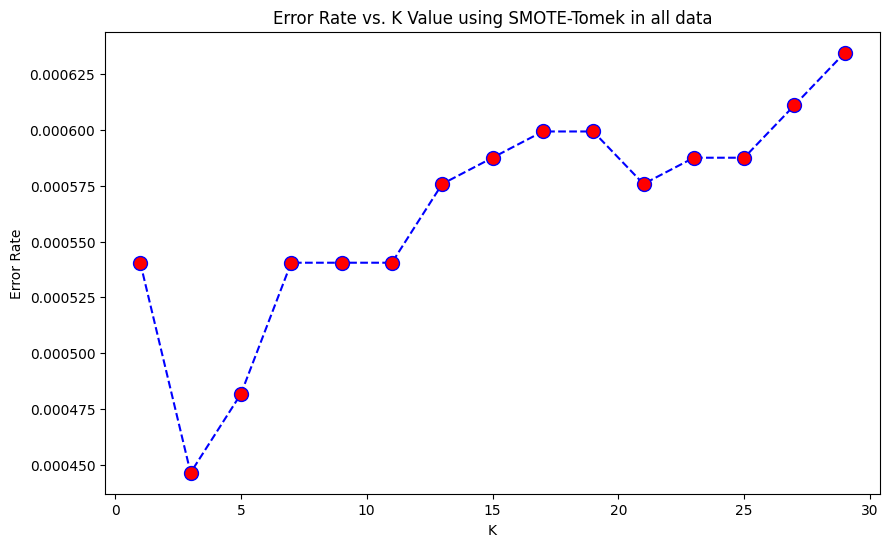

In [15]:

error_rate = []
max_iter = 30
range_iter = list(range(1, max_iter, 2))

for i in track(range_iter, description="Processing...", total=len(range_iter)):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)
    pred_i = knn.predict(FEATURES_TEST_PRE_UB)
    error_rate.append(np.mean(pred_i != TARGET_TEST_PRE_UB))

plt.figure(figsize=(10, 6))
plt.plot(range_iter, error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value using SMOTE-Tomek in all data')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate), "at K =", error_rate.index(min(error_rate)) + 1)


Output()

[20:43:13] Accuracy: 0.9994594975677391 with k=1                              ]8;id=646309;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=913254;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993604592607512 with k=1                              ]8;id=349937;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=302242;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:44:03] Accuracy: 0.9995417479378658 with k=3                              ]8;id=638742;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=885810;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9994511028300938 with k=3                              ]8;id=8546;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=776892;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:44:53] Accuracy: 0.99950649777924 with k=5                                ]8;id=421115;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=20905;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9994511028300936 with k=5                              ]8;id=777274;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=520587;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:45:43] Accuracy: 0.9994359974619886 with k=7                              ]8;id=5325;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=166313;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9994259240608319 with k=7                              ]8;id=451169;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=895820;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:46:30] Accuracy: 0.9994242474091133 with k=9                              ]8;id=103343;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=675197;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9994108167992748 with k=9                              ]8;id=550220;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=88913;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:47:18] Accuracy: 0.999412497356238 with k=11                              ]8;id=394551;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=182181;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993906737838654 with k=11                             ]8;id=961176;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=229632;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:48:06] Accuracy: 0.9993772471976123 with k=13                             ]8;id=46230;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=580488;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993957095377178 with k=13                             ]8;id=221105;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=844441;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:48:51] Accuracy: 0.9993184969332362 with k=15                             ]8;id=219971;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=747154;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993957095377178 with k=15                             ]8;id=557284;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=322698;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:49:34] Accuracy: 0.9993184969332362 with k=17                             ]8;id=393535;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=749660;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9994057810454227 with k=17                             ]8;id=357096;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=839396;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:50:20] Accuracy: 0.9993184969332362 with k=19                             ]8;id=410876;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=338892;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993957095377178 with k=19                             ]8;id=358993;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=140658;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:51:09] Accuracy: 0.9993419970389866 with k=21                             ]8;id=64614;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=822675;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.999385638030013 with k=21                              ]8;id=304967;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=320465;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:51:59] Accuracy: 0.9993419970389866 with k=23                             ]8;id=445771;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=564901;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993755665223084 with k=23                             ]8;id=577500;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=857485;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:52:43] Accuracy: 0.9993184969332362 with k=25                             ]8;id=267324;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=931431;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.9993806022761607 with k=25                             ]8;id=11097;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=77861;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:53:27] Accuracy: 0.9992949968274857 with k=27                             ]8;id=141437;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=346934;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.999385638030013 with k=27                              ]8;id=913209;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=82108;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

[20:54:13] Accuracy: 0.9992832467746104 with k=29                             ]8;id=472039;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=467169;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#8\8]8;;\

           Accuracy: 0.999385638030013 with k=29                              ]8;id=681520;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py\1848589587.py]8;;\:]8;id=421921;file://C:\Users\Rules\AppData\Local\Temp\ipykernel_21268\1848589587.py#9\9]8;;\

The optimal number of neighbors is 3

The optimal number of neighbors is 3

The accuracy of the final model is 99.95%

Maximum accuracy:- 0.9994511028300938 at K = 2

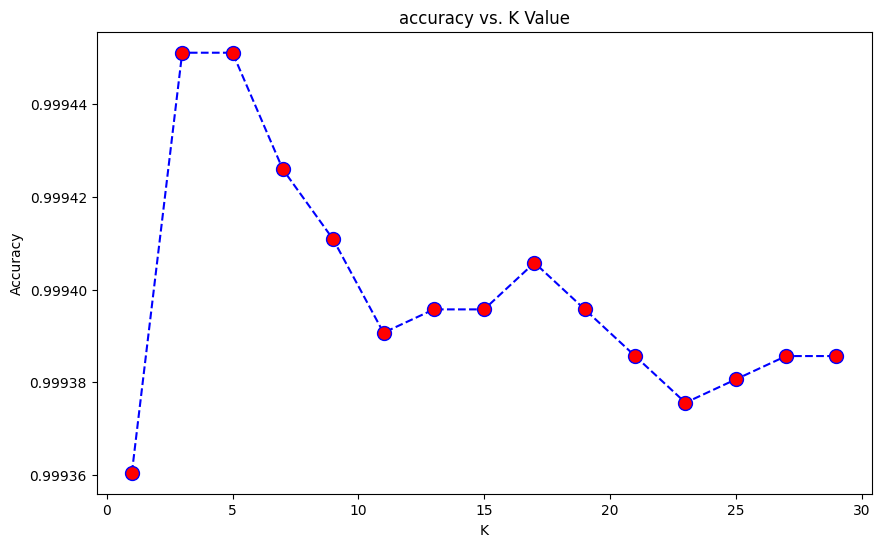

In [16]:
acc = []
for k in track(range_iter, description="Processing...", total=len(range_iter)):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB, cv=5, scoring='accuracy')
    score = scores.mean()
    knn.fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)
    real_accuracy = knn.score(FEATURES_TEST_PRE_UB, TARGET_TEST_PRE_UB)
    console.log(f"Accuracy: {real_accuracy} with k={k}")
    console.log(f"Accuracy: {score} with k={k}")
    acc.append(score)

optimal_k = range_iter[acc.index(max(acc))]
console.print(f"The optimal number of neighbors is {optimal_k}", style="bold red")

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)

accuracy = knn_final.score(FEATURES_TEST_PRE_UB, TARGET_TEST_PRE_UB)

console.print("The optimal number of neighbors is %d" % optimal_k)
console.print("The accuracy of the final model is %.2f%%" % (accuracy * 100))

plt.figure(figsize=(10,6))
plt.plot(range_iter, acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-", max(acc),"at K =", acc.index(max(acc)) + 1)

In [30]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)

accuracy = knn_final.score(FEATURES_TEST_PRE_UB, TARGET_TEST_PRE_UB)

console.print("The optimal number of neighbors is %d" % optimal_k)
console.print("The accuracy of the final model is %.2f%%" % (accuracy * 100))

The optimal number of neighbors is 3

The accuracy of the final model is 99.95%

In [32]:
from sklearn.metrics import confusion_matrix


c_matrix = confusion_matrix(TARGET_TEST_PRE_UB, knn_final.predict(FEATURES_TEST_PRE_UB))
print(c_matrix)

[[84966     9]
 [   30   101]]

Nos quedamos con k = 2

In [33]:
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance').fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)
yhat = neigh.predict(FEATURES_TEST_PRE_UB)
accuracy = cross_val_score(neigh, FEATURES_PRE_UB, TARGET_PRE_UB, cv=10, scoring='accuracy')

In [35]:
from sklearn.metrics import confusion_matrix

print(accuracy.mean())

conf_matrix = confusion_matrix(TARGET_TEST_PRE_UB, yhat)
print('Confusion matrix: \n', conf_matrix)

0.9861785634007412

Confusion matrix: 
 [[84958    17]
 [   29   102]]

#### Clasificador Naive Bayes

Clasificador Gaussiano, averiguamos el mejor modelo

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
param_grid = {'var_smoothing': np.arange(0.0, 10.1, 0.1)}
grid = GridSearchCV(gnb, param_grid, cv=5)
grid.fit(FEATURES_TRAIN_PRE_B, TARGET_TRAIN_PRE_B)

print("Best var_smoothing value: ", grid.best_estimator_.var_smoothing)

gnb_best = grid.best_estimator_.fit(FEATURES_TRAIN_PRE_B, TARGET_TRAIN_PRE_B)

y_pred = gnb_best.predict(FEATURES_TEST_PRE_B)
accuracy = cross_val_score(gnb_best, FEATURES_PRE_B, TARGET_PRE_B, cv=10, scoring='accuracy')
conf_matrix = confusion_matrix(TARGET_TEST_PRE_B, y_pred)

print("Filas totales: %d \nFilas no clasificadas correctamente: %d" % (FEATURES_TEST_PRE_B.shape[0], (TARGET_TEST_PRE_B != y_pred).sum()))
print("Score: ", accuracy.mean())
print('Matriz de confusión:')
print(conf_matrix)


Best var_smoothing value:  0.0

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='recall')
grid_search.fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(FEATURES_TEST_PRE_UB)

accuracy = accuracy_score(TARGET_TEST_PRE_UB, y_pred)
precision = precision_score(TARGET_TEST_PRE_UB, y_pred)
recall = recall_score(TARGET_TEST_PRE_UB, y_pred)
f1 = f1_score(TARGET_TEST_PRE_UB, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("Best hyperparameters:", grid_search.best_params_)

grid_search.best_estimator_.fit(FEATURES_TRAIN_PRE_UB, TARGET_TRAIN_PRE_UB)
accuracy = cross_val_score(grid_search.best_estimator_, FEATURES_PRE_UB, TARGET_PRE_UB, cv=10, scoring='accuracy')
conf_matrix = confusion_matrix(TARGET_TEST_PRE_UB, y_pred)

print("Filas totales: %d \nFilas no clasificadas correctamente: %d" % (FEATURES_TEST_PRE_UB.shape[0], (TARGET_TEST_PRE_UB != y_pred).sum()))
print("Score: ", accuracy.mean())
print('Matriz de confusión:')
print(conf_matrix)

Accuracy: 0.9994594975677391

Precision: 0.8632478632478633

Recall: 0.7709923664122137

F1-score: 0.8145161290322581

Best hyperparameters:
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

Filas totales: 85106 
Filas no clasificadas correctamente: 46

Score:  0.9200500466845389

Matriz de confusión:

[[84959    16]
 [   30   101]]